In [8]:
########## problem 1 ######################
def hatFunc(x):
    import numpy as np
    hold= (x<0)
    hold2=np.logical_and(0<=x , x<1)
    hold3=np.logical_and(1<=x , x<2)
    hold4= (x>=2)
    applying_condition=np.zeros(len(x))    
    applying_condition[hold]=0
    applying_condition[hold2]=x[hold2]
    applying_condition[hold3]=2-x[hold3]
    applying_condition[hold4]=0
    return applying_condition

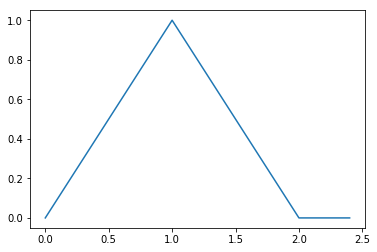

In [9]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(0,2.5,0.1)
#print x
y=hatFunc(x)
#print y
plt.plot(x,y)
plt.show()

In [10]:
########## pproblem 2 non-vectorized #############
#def Energy(m,v_0):
    #import numpy as np
    #g=9.81
    #v_0=float(v_0)
    #t=np.arange(0,2*(v_0/g),0.005)
    #print t
    #y=list()
    #v=list()
    #for i in range (0,len(t)):
        #y.append(v_0*t[i]-0.5*g*t[i]**2)
        #v.append(v_0-g*t[i])
    #K=list()
    #P=list()
    #for j in range (0,len(v)):
        #K.append(0.5*m*v[j]**2)
        #P.append(m*g*y[j])
    #return P,K,t

#def Plot_Energy(P,K,t):
    #import matplotlib.pyplot as plt
    #E=list()
    #for i in range (0,len(K)):
        #E.append(P[i]+K[i])
    #print E
    #plt.figure(figsize=(20,12))
    #plt.plot(t,P)
    #plt.plot(t,K)
    #plt.plot(t,E)
    #plt.ylabel('Energies')
    #plt.xlabel('time')
    #plt.axis([0, t[-1], 0, (E[-1]+100)])
    #return plt.show()

In [11]:
###################problem 2 but vectorized#######################
def Energy_vect(m,v_0):
    import numpy as np
    g=9.81
    v_0=float(v_0)
    t=np.arange(0,2*(v_0/g),0.005)
    #print t
    y=np.zeros(len(t))
    v=np.zeros(len(t))
    hold=(t>=0)
    
    y[hold]=v_0*t-0.5*g*t**2
    v[hold]=v_0-g*t
    

    #for i in range (0,len(t)):
        #y.append(v_0*t[i]-0.5*g*t[i]**2)
        #v.append(v_0-g*t[i])
        
    K=np.zeros(len(t))
    P=np.zeros(len(t))
    K[hold]=0.5*m*v**2
    P[hold]=m*g*y
    
    #for j in range (0,len(v)):
        #K.append(0.5*m*v[j]**2)
        #P.append(m*g*y[j])
    return P,K,t

def Plot_Energy_vect(P,K,t):
    import matplotlib.pyplot as plt
    E=np.zeros(len(t))
    hold=(t>=0)
    E[hold]=P+K
    
    #for i in range (0,len(K)):
        #E.append(P[i]+K[i])
        
    #print E
    plt.figure(figsize=(20,12))
    plt.plot(t,P)
    plt.plot(t,K)
    plt.plot(t,E)
    plt.ylabel('Energies')
    plt.xlabel('time')
    plt.axis([0, t[-1], 0, (E[-1]+100)])
    return plt.show()

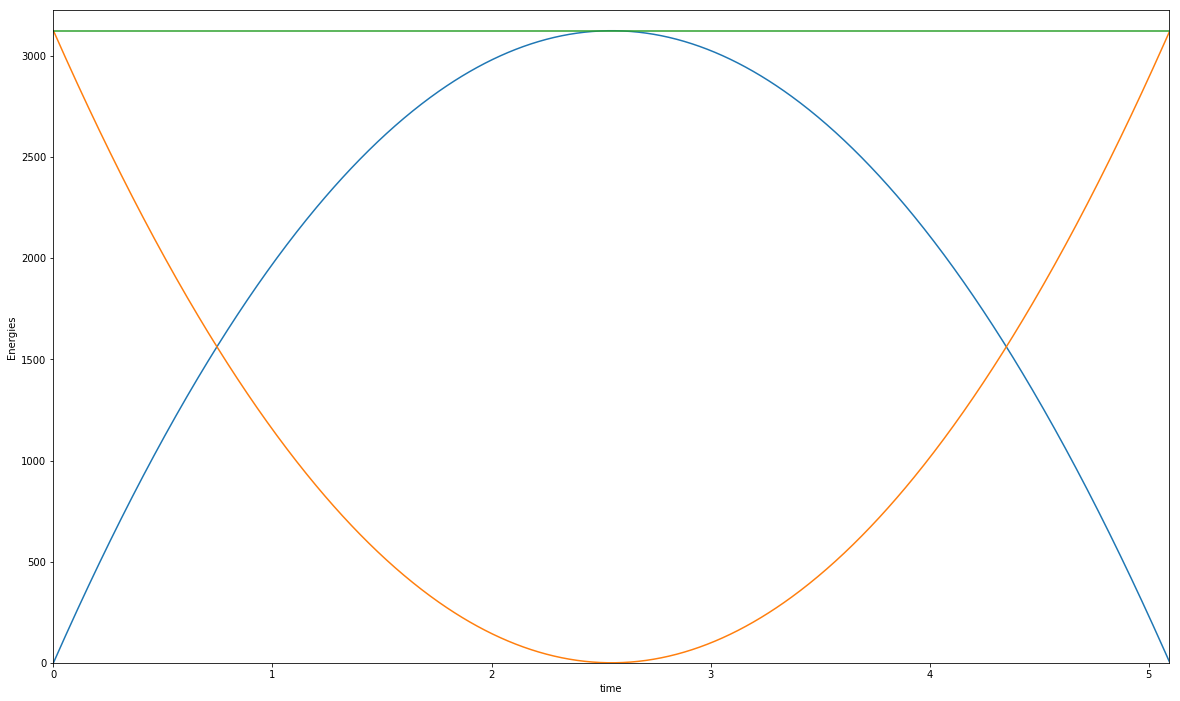

In [12]:
P,K,t=Energy_vect(10,25)
Plot_Energy_vect(P,K,t)

In [13]:
########### Problem 3 #########################
def midpoint(f, a, b, n):
    import matplotlib.pyplot as plt
    a=float(a)
    b=float(b)
    h=(b-a)/n ####step size
    Area=0
    for i in range(0, n):
        Area+=h*f(a+i*h+0.5*h)
    return Area

def expo(x):
    import numpy as np
    return np.exp(x)

def cosine(x):
    import numpy as np
    return np.cos(x)

def sine(x):
    import numpy as np
    return np.sin(x)

def func(x):
    import numpy as np
    return x*(12-x)+np.sin(np.pi*x)

#def midpoint_fill(f, a, b, n): ###### doesn't work for part 4, but shows area that's filled in#############
 #   import matplotlib.pyplot as plt
  #  import sympy as sy
   # a=float(a)
    #b=float(b)
   # h=(b-a)/n ####step size
    #Area=0
 #   x=np.linspace(a,b,h)
  #  plt.figure(figsize=(20,12))
   # for i in range(0, n):
    #    y=plt.bar(a+h*i, f(2*a + (2*i + 1)*h), h)
     #   plt.fill_between(x,y,f(x),color='blue')
    #return plt.show()


In [14]:
import numpy as np
import math
from scipy.integrate import quad

n=input('how many points would you like to use for midpoint method?')
print '\n'

hold=quad(expo,0,np.log(3))
#print hold
hold2=midpoint(expo,0,np.log(3),n)
Comparison=abs(hold[0]-hold2)
print 'The difference using',n,'points is',Comparison,'\n\n'

hold=quad(cosine,0,np.pi)
hold2=midpoint(cosine,0,np.pi,n)
Comparison=abs(hold[0]-hold2)
print 'The difference using',n,'points is',Comparison,'\n\n'

hold=quad(sine,0,np.pi)
hold2=midpoint(sine,0,np.pi,n)
Comparison=abs(hold[0]-hold2)
print 'The difference using',n,'points is',Comparison,'\n\n'

hold=quad(sine,0,(np.pi)/2.0)
hold2=midpoint(sine,0,(np.pi)/2.0,n)
Comparison=abs(hold[0]-hold2)
print 'The difference using',n,'points is',Comparison,'\n\n'

how many points would you like to use for midpoint method?1000


The difference using 1000 points is 1.0057907484650741e-07 


The difference using 1000 points is 4.122715974343869e-18 


The difference using 1000 points is 8.224672694012725e-07 


The difference using 1000 points is 1.0280838680376547e-07 




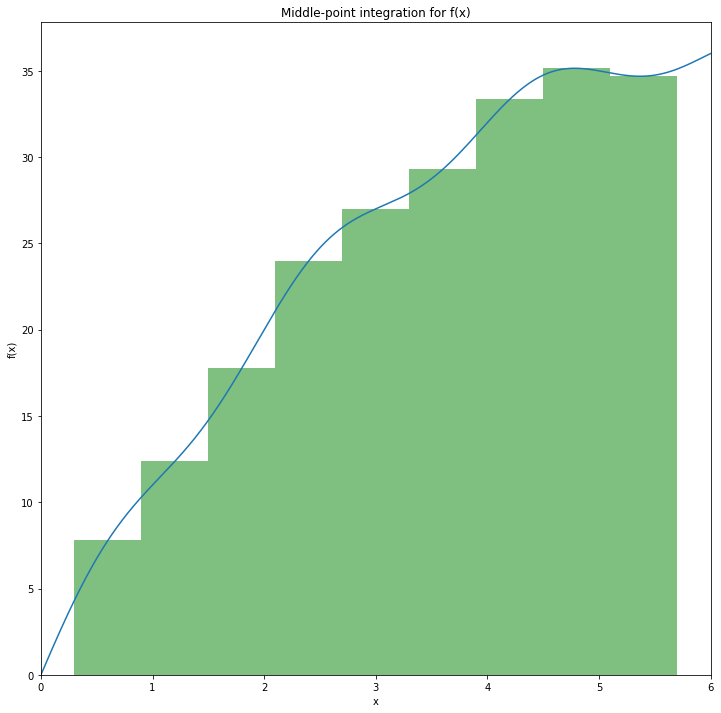

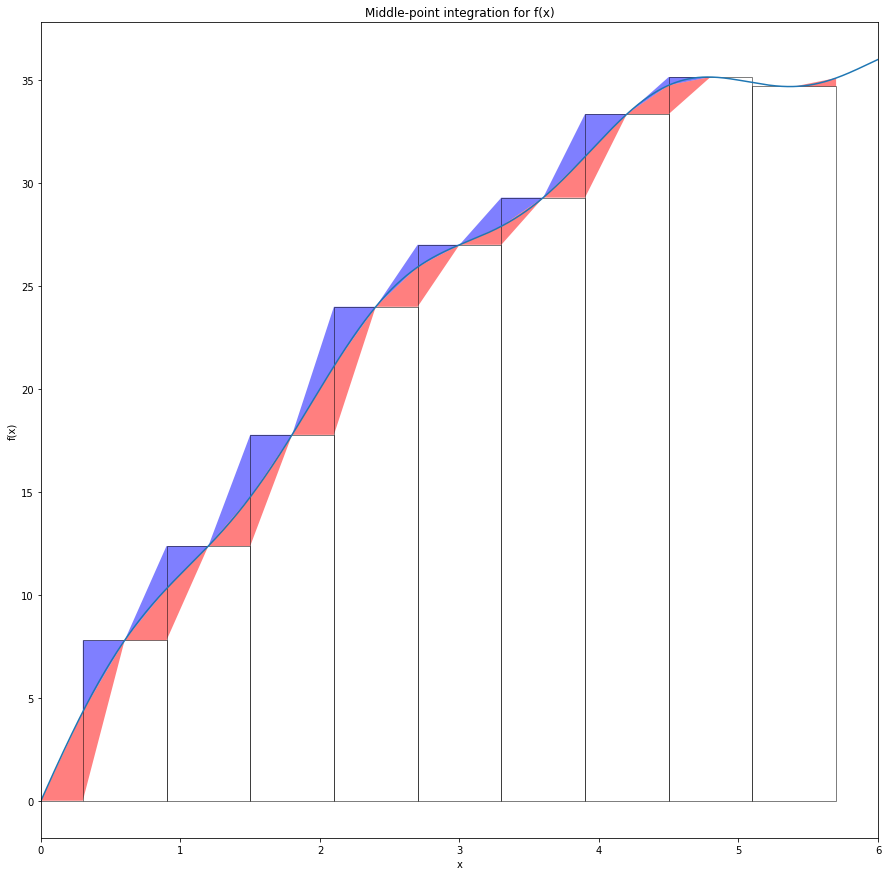

In [15]:
def midplot(f,a,b,n):
    import matplotlib.pyplot as plt 
    import numpy as py
    a=float(a)
    b=float(b)
    k=(b-a)/10000 ###for plotting many points for function to get smooth line
    h = (b-a)/n
    x = py.arange(a,b+k,k)
    plt.figure(figsize=(12,12))
    plt.plot(x,f(x))
    rect_x = py.arange(a,b,h)
    height = f(rect_x)
    plt.bar(rect_x,height,width=h,alpha=0.5,facecolor='green')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Middle-point integration for f(x)')
    plt.xlim(a,b)
    plt.show()
    
    
    
    
    from matplotlib.patches import Rectangle
    plt.figure(figsize=(15,15))
    plt.plot(x,f(x))
    Axis = plt.gca()
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Middle-point integration for f(x)')
    plt.xlim(a,b)
    for i in range (0,len(height)):
        Axis.add_patch(Rectangle((rect_x[i]-h/2,0),h,height[i],fill=None, alpha=0.5))
    
    #plt.show()
    #print rect_x
    
    x_left=py.arange(a+(h/2.0),b-(h),h/2.0)
    x_right=py.arange(a,b,h/2.0)

    
    y1=map(f,x_left)
    y1=py.around(py.array(y1),2)
    
    y2=height[1:len(height)+1:1]
    y2=py.repeat(y2,2)    
    y2=py.around(py.array(y2),2)
    
    #print len(y1),len(y2)
    y3=py.repeat(height,2)
    y3=py.around(py.array(y3),2)
    
    plt.fill_between(x_left,y2,y1,where=(y2>=y1),facecolor='blue',alpha=0.5)
    
    y1=map(f,x_right)
    y1=py.around(py.array(y1),2)
    plt.fill_between(x_right,y1,y3,where=(y1>=y3),facecolor='red',alpha=0.5)
    plt.show()
    
    #print y1,'\n',y3
    
    
    
    
    
    
midplot(func,0,6,10)